## Задача: преобразовать текст в мешок слов, затем закодировать в разряженную матрицу и понизить размерность методом главных компонент таким образом, чтобы доля информации в итоге была приблизительно 80 процентов 

In [75]:
import numpy as np
import pandas as pd
import math
#import re for splitting text to words
import re
#import codecs to encode data to utf-8
import codecs
#import nltk to process words
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

#set pandas print options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

#import matplotlib for plot
import matplotlib.pyplot as plt
%matplotlib inline

### считываем данные из файла (отрывок из книги белый клык)

In [76]:
file_obj = codecs.open("white_fang.txt","r", encoding = "UTF8")
data_list = file_obj.readlines()

In [77]:
text = ""
for line in data_list: 
    text += line.strip()

In [78]:
sentences = nltk.sent_tokenize(text)

In [79]:
for sen in sentences:
    print(sentences)

['Dark spruce forest frowned on either side the frozen waterway.', 'The trees had been stripped by a recent wind of their white covering of frost, and they seemed to lean towards each other, black and ominous, in the fading light.', 'A vast silence reigned over the land.', 'The land itself was a desolation, lifeless, without movement, so lone and cold that the spirit of it was not even that of sadness.', 'There was a hint in it of laughter, but of a laughter more terrible than any sadness - a laughter that was mirthless as the smile of the sphinx, a laughter cold as the frost and partaking of the grimness of infallibility.', 'It was the masterful and incommunicable wisdom of eternity laughing at the futility of life and the effort of life.', 'It was the Wild, the savage, frozen- hearted Northland Wild.', 'But there WAS life, abroad in the land and defiant.', 'Down the frozen waterway toiled a string of wolfish dogs.', 'Their bristly fur was rimed with frost.', 'Their breath froze in th

### разбиваем с помощью регулярного выражения на слова

In [80]:
# данное регулярное выражение разбивает на слова, без знаков препинания
word_regex = r"[A-Za-z]+[-]?[A-Za-z]+"
rgx = re.compile(word_regex)

In [81]:
words = list(rgx.findall(text))

### понижаем регистр слова

In [82]:
words = [word.lower() for word in words]

In [83]:
words

['dark',
 'spruce',
 'forest',
 'frowned',
 'on',
 'either',
 'side',
 'the',
 'frozen',
 'waterway',
 'the',
 'trees',
 'had',
 'been',
 'stripped',
 'by',
 'recent',
 'wind',
 'of',
 'their',
 'white',
 'covering',
 'of',
 'frost',
 'and',
 'they',
 'seemed',
 'to',
 'lean',
 'towards',
 'each',
 'other',
 'black',
 'and',
 'ominous',
 'in',
 'the',
 'fading',
 'light',
 'vast',
 'silence',
 'reigned',
 'over',
 'the',
 'land',
 'the',
 'land',
 'itself',
 'was',
 'desolation',
 'lifeless',
 'without',
 'movement',
 'so',
 'lone',
 'and',
 'cold',
 'that',
 'the',
 'spirit',
 'of',
 'it',
 'was',
 'not',
 'even',
 'that',
 'of',
 'sadness',
 'there',
 'was',
 'hint',
 'in',
 'it',
 'of',
 'laughter',
 'but',
 'of',
 'laughter',
 'more',
 'terrible',
 'than',
 'any',
 'sadness',
 'laughter',
 'that',
 'was',
 'mirthless',
 'as',
 'the',
 'smile',
 'of',
 'the',
 'sphinx',
 'laughter',
 'cold',
 'as',
 'the',
 'frost',
 'and',
 'partaking',
 'of',
 'the',
 'grimness',
 'of',
 'infallib

In [84]:
stemmer = PorterStemmer()

### используем стемминг, чтобы привести слова к основе слова, и избавляемся от стоп слов

In [85]:
stop_words = stopwords.words("english")
without_stop_words = [word for word in words if not word in stop_words]
bag_of_words = [stemmer.stem(word) for word in without_stop_words]

In [86]:
bag_of_words

['dark',
 'spruce',
 'forest',
 'frown',
 'either',
 'side',
 'frozen',
 'waterway',
 'tree',
 'strip',
 'recent',
 'wind',
 'white',
 'cover',
 'frost',
 'seem',
 'lean',
 'toward',
 'black',
 'omin',
 'fade',
 'light',
 'vast',
 'silenc',
 'reign',
 'land',
 'land',
 'desol',
 'lifeless',
 'without',
 'movement',
 'lone',
 'cold',
 'spirit',
 'even',
 'sad',
 'hint',
 'laughter',
 'laughter',
 'terribl',
 'sad',
 'laughter',
 'mirthless',
 'smile',
 'sphinx',
 'laughter',
 'cold',
 'frost',
 'partak',
 'grim',
 'infal',
 'master',
 'incommunic',
 'wisdom',
 'etern',
 'laugh',
 'futil',
 'life',
 'effort',
 'life',
 'wild',
 'savag',
 'frozen',
 'heart',
 'northland',
 'wild',
 'life',
 'abroad',
 'land',
 'defiant',
 'frozen',
 'waterway',
 'toil',
 'string',
 'wolfish',
 'dog',
 'bristli',
 'fur',
 'rime',
 'frost',
 'breath',
 'froze',
 'air',
 'left',
 'mouth',
 'spout',
 'forth',
 'spume',
 'vapour',
 'settl',
 'upon',
 'hair',
 'bodi',
 'form',
 'crystal',
 'frost',
 'leather',


### преобразуем мешок слов в матрицу

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

In [88]:
bag_matrix = count_vec.fit_transform(bag_of_words)

In [89]:
df = pd.DataFrame(bag_matrix.toarray(), columns=count_vec.get_feature_names())

In [90]:
df

,abroad,abyss,advanc,adventur,...,work,world,would,yet
0,0,0,0,0,...,0,0,0,0
1,0,0,0,0,...,0,0,0,0
2,0,0,0,0,...,0,0,0,0
3,0,0,0,0,...,0,0,0,0
4,0,0,0,0,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
327,0,0,0,0,...,0,0,0,0
328,0,0,0,0,...,0,0,0,0
329,0,0,0,0,...,0,0,0,0
330,0,0,0,0,...,0,0,0,0


### понижаем размерность методом главных компонент

In [91]:
from sklearn.decomposition import PCA
count_unique_words = df.shape[1]

In [92]:
pca = PCA(n_components=count_unique_words - 1)
pca.fit(df.values)

PCA(copy=True, iterated_power='auto', n_components=240, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [93]:
varience_ratio = pca.explained_variance_ratio_

### рисуем график каменистой осыпи (с помощью данного метода  можно найти место, где убывание собственных значений векторов слева направо максимально замедляется)

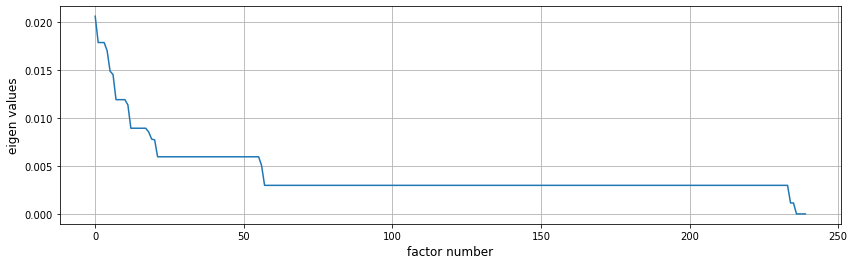

In [94]:
plt.figure(figsize=(14, 4))
plt.plot(varience_ratio)
plt.xlabel('factor number', fontsize=12)
plt.ylabel('eigen values', fontsize=12)
plt.grid()

### строим график зависимостии компонент от доли информации

In [95]:
cumsum_varience_ratio = varience_ratio.cumsum()

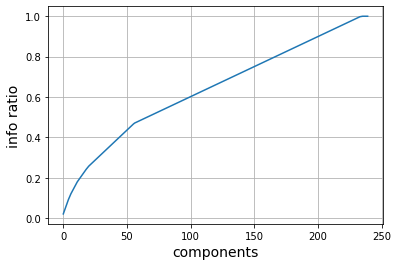

In [96]:
plt.plot(cumsum_varience_ratio)
plt.xlabel('components', fontsize=14)
plt.ylabel('info ratio', fontsize=14)
plt.grid()

In [97]:
cumsum_varience_ratio

array([0.02060582, 0.03847033, 0.05633484, 0.07419935, 0.09122429,
       0.10611138, 0.12062938, 0.13253905, 0.14444872, 0.1563584 ,
       0.16826807, 0.17962676, 0.18855901, 0.19749127, 0.20642352,
       0.21535578, 0.22428803, 0.23322029, 0.24175546, 0.24955044,
       0.25726926, 0.2632241 , 0.26917894, 0.27513377, 0.28108861,
       0.28704345, 0.29299828, 0.29895312, 0.30490795, 0.31086279,
       0.31681763, 0.32277246, 0.3287273 , 0.33468214, 0.34063697,
       0.34659181, 0.35254665, 0.35850148, 0.36445632, 0.37041116,
       0.37636599, 0.38232083, 0.38827567, 0.3942305 , 0.40018534,
       0.40614018, 0.41209501, 0.41804985, 0.42400469, 0.42995952,
       0.43591436, 0.44186919, 0.44782403, 0.45377887, 0.4597337 ,
       0.46568854, 0.47072064, 0.47369806, 0.47667548, 0.4796529 ,
       0.48263032, 0.48560773, 0.48858515, 0.49156257, 0.49453999,
       0.49751741, 0.50049483, 0.50347224, 0.50644966, 0.50942708,
       0.5124045 , 0.51538192, 0.51835934, 0.52133675, 0.52431

### создаем функцию, которая будет возращать, сколько компонент нужно выделить в PCA, чтобы доля информации была приблизительно info_ratio

In [98]:
def get_n(cumsum_var_ratio, info_ratio):
    """
    
    Summary line
    
    get n_components in a such way, that total information ratio will be approximately info_ratio
    
    Parameters:
    cumsum_var_ratio (list): cumsum varience ratio list
    info_ratio (float): information ratio
    
    Returns:
    int: n_components in a such way, that total information ratio will be approximately info_ratio
    
    """
    for i in range(len(cumsum_var_ratio)):
        if cumsum_var_ratio[i] > info_ratio:
            return i

In [99]:
get_n(cumsum_varience_ratio, 0.8)

167

In [100]:
new_pca = PCA(n_components=167)
res_data = new_pca.fit_transform(df.values)

In [101]:
res_data.shape

(332, 167)

### Вывод: один из главных недостатков способа представления текста в виде мешка слов - это проблема "проклятия размерности". Это значит, что при кодировании мешка слов в матрицу очень часто получается матрица высокой размерности и, поэтому метод главных компонент очень часто на практике используется вместе с мешком слов 